In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4282,ham,Science tells that chocolate will melt under t...,NaN,NaN,NaN
4431,ham,Dont think you need yellow card for uk travel....,NaN,NaN,NaN
5106,ham,Ding me on ya break fassyole! Blacko from londn,NaN,NaN,NaN
824,ham,Have a good evening! Ttyl,NaN,NaN,NaN
3289,ham,My tuition is at 330. Hm we go for the 1120 to...,NaN,NaN,NaN


In [4]:
df.shape
#steps-> cleaning ,eda , text preprocessing ,model building,evaluation , improvements , converting into wesite , deploy

(5572, 5)

## 1.Data cleaning 

In [5]:
df.info()
## most values are missing in unnamed 2,3,4 -> they are useless practically ->drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2' ,'Unnamed: 3', 'Unnamed: 4' ] , inplace= True)

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
383,ham,Hey i will be late ah... Meet you at 945+
433,ham,Booked ticket for pongal?
2126,ham,You do got a shitload of diamonds though
46,ham,Didn't you get hep b immunisation in nigeria.
3575,ham,The sign of maturity is not when we start sayi...


In [8]:
# label encoding ham spam (0,1)
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['target'])


array([0, 0, 1, ..., 0, 0, 0])

In [9]:
df['target'] = encoder.fit_transform(df['target'])


In [10]:
#checking missing values
df.isnull().sum()
#no missing values found

target    0
text      0
dtype: int64

In [11]:
#checking duplicate values
df.duplicated().sum()
#403 duplicate values ->remove them

403

In [12]:
#removing duplicate values
df = df.drop_duplicates(keep='first')  # keep first ensures that only one vale of them is maintained
df.duplicated().sum()
#now we have 0 duplaice values

0

## 2.Exploratory Data Analysis

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

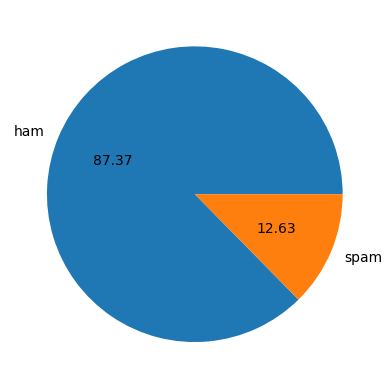

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels =['ham','spam'] ,autopct="%0.2f")
plt.show()
# 87 percent not spam and 12 percent spam ->data is imbalanced

In [15]:
# we will now make 3 more columns -> no characters in message , no ->words etc
# => we wil have to import another library nltk -> natural language toolkit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters']=df['text'].apply(len)   #gives number of characters =>apply is pandas function which allows to apply one fuction along the row of the data


In [17]:
#now number of words
df['text'].apply(lambda x : nltk.word_tokenize(x)) # gives a list of each messages as words
# => to get word simply use len funtion
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [18]:
# now adding number of sentences->using nltk only use sent_tokenize
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
# if we used sent tokenize directly without len -> it returns sentences of each row in form of list => one sentence is one item of list


In [19]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# using the describe function to describe ham and spam separately
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#general observation being spam message has more words , more characters and sentences

In [23]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
#representing in histplot
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

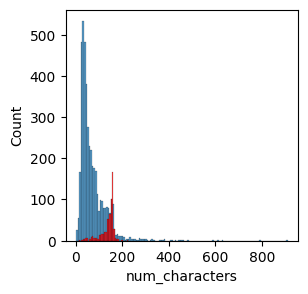

In [25]:
plt.figure(figsize=(3,3))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


In [26]:
#the pattern is similar for words and sentences also

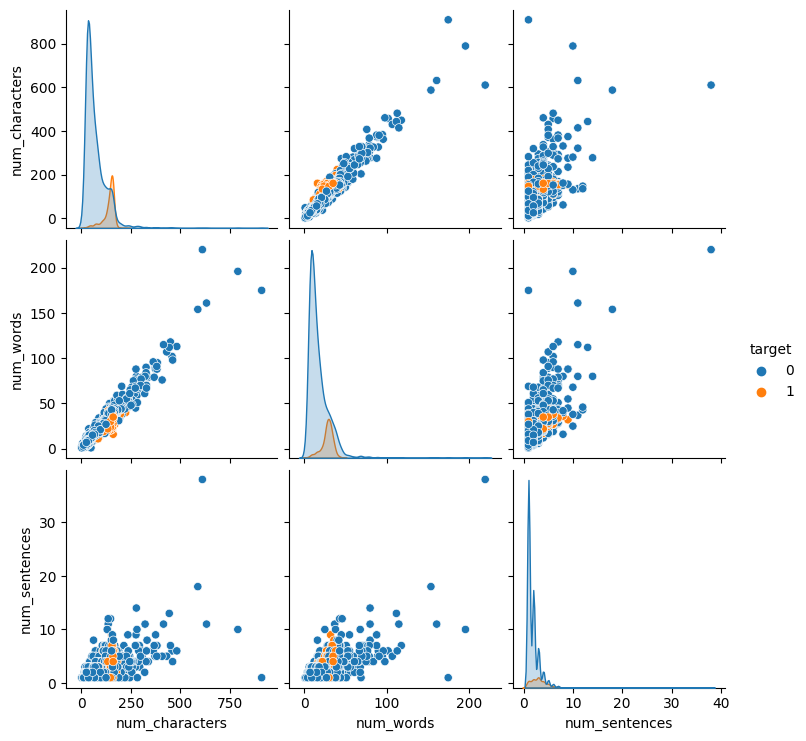

In [27]:
sns.pairplot(df,hue='target')

In [28]:
# getting correlation coefficients
df[['target','um_words','nnum_characters','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


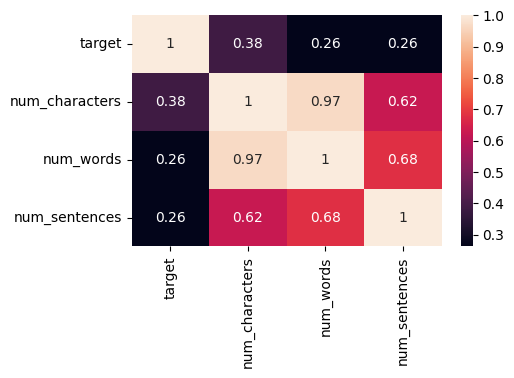

In [29]:
#putting in heat map
plt.figure(figsize=(5,3))
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr() , annot=True)
#annotation = true gives corr coeff on the box
plt.show()

In [30]:
# when we build a model we will use num charaacters as base because of hi corr with remaining two and also target

 ## Data Preprocessing
 -lower case
 -tokenize
 -Removing special characters
 -Removing stop words and punctuation
 -stemming

In [31]:
# stop words examples is ,was ,the etc;
#tokenization means conversion into breaking sentences into words
# stemming -> groups similar type of words (dancing dance danced)->dance
# we create a function


In [32]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
print(ps.stem('loving') , ps.stem('dancing'))

love danc


In [35]:
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():   #i> isalnum sees if the character is alphanumeric
            y.append(i)
    text = y[:]  
    y.clear()    #->we did this beacus string are immutable . so the get exact copy use this slicing method
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)    
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))            
    return " ".join(y)   #-> to return as a string       

In [36]:
transform_text('hEllo my Name %& is AbhIshek , i iam loving machine learning , how about you?')

'hello name abhishek iam love machin learn'

In [37]:
#creating a new column for transformed text

df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
# generating word cloud for ham ans spam
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size = 10,background_color='white')

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

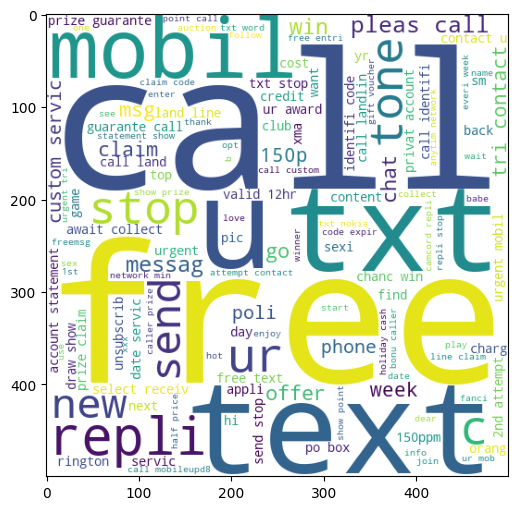

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [41]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

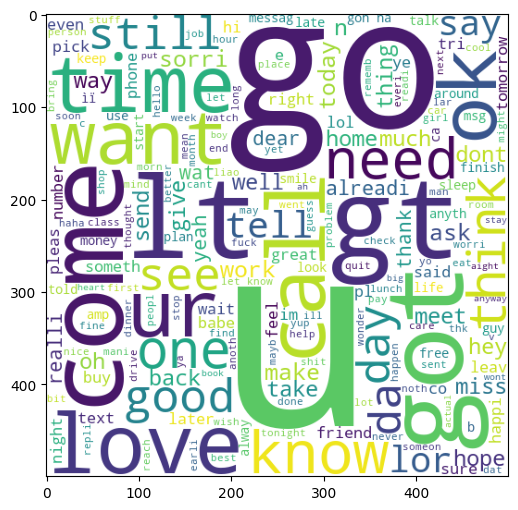

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [43]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word  in msg.split():
        spam_corpus.append(word)

In [44]:
from collections import Counter
len(spam_corpus)


9939

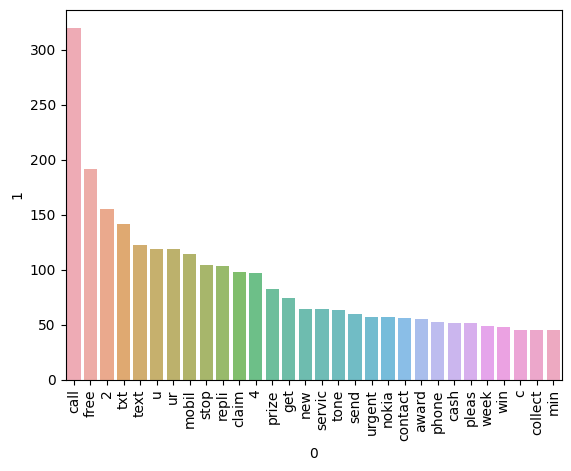

In [45]:
# we can further analyze the data by finding out the most common words in spam and ham messages


sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1],alpha = 0.8)
plt.xticks(rotation='vertical')
plt.show()


In [46]:
#similary top thirty can be found out for ham classifier also

# 4.Model Building
we consider naive bayes method becouse there is a general consensus that naives bayes is good for textual data
we will also check other algorithms but for now consider the naive bayes to be the base

In [47]:
#naive bayes requires numaerical inputs -> target is input but tranformed_text is not numerical
# so we will vectorise -> 
# methods are 1) bag of words(we make column of frequent words and for each message check how many frequent words exist)
           #  2) tfidf (term frequency–inverse document frequency)
           #  3) word to vec
#tfidf works better


In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # max features was introduced later and it incerased the accuracy -->in X.shape we saw 6708 words maxfeature restricts it to 3000 words

In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5169, 3000)

In [51]:
y = df['target'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### In model building we saw that , 
->initially we used bag of words i.e count vectorizer 
<br>->upon using tfidf vectoriser we got better accuracy and perfect precision
<br>-> here , precision is a better parameter than accuracy because precision shows number of true positives i.e correctly classified as spam
<br>-> this is beacuse the data we use is imbalanced (less spam and more ham)
<br>-> we also tried scaling  , using voting classifier(uses 3 best classifiers of our choice in combination) , also tried using stacking(same as vpting but we can assign algorithms based on precidence) , but the best result was still given my MNB with tfidf vectorizations
<br> we can conclude by saying that MNB is better for our project


In [57]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))
